# Prática 5

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere os dados RestaurantVisitors.csv, que contém dados de visitantes de restaurantes, baseado em uma <a href='https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting'> competição Kaggle </a>. Os dados consideram o total de visitantes diários de quatro restaurantes localizados nos Estados Unidos, sujeitos aos feriados americanos. Para a variável exógena, utilizaremos os feriados, para verificar como eles afetam o movimento nos restaurantes. O conjunto de dados contém 478 dias de dados de restaurantes, além de 39 dias adicionais de dados de feriados para fins de previsão.


Ajuste um modelo SARIMA com uma variável exógena "holiday" usando o enfoque de modelos de espaço de estado para a variável "total". 

Faça a divisão da base em treino e teste e verifique as previsões obtidas.

Em seguida, faça a previsão para observações futuras com as informações de feriados disponíveis.

**1. Carregue as bibliotecas necessárias.**

In [174]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              


# Iniba warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


**2. Faça a leitura dos dados. Exclua as observações faltantes em total, que correspondem às observações extras de feriados.**

In [215]:
# Leitura dos dados

df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'
df.head()

df1 = df.dropna()

**3. Faça a visualização dos dados.**

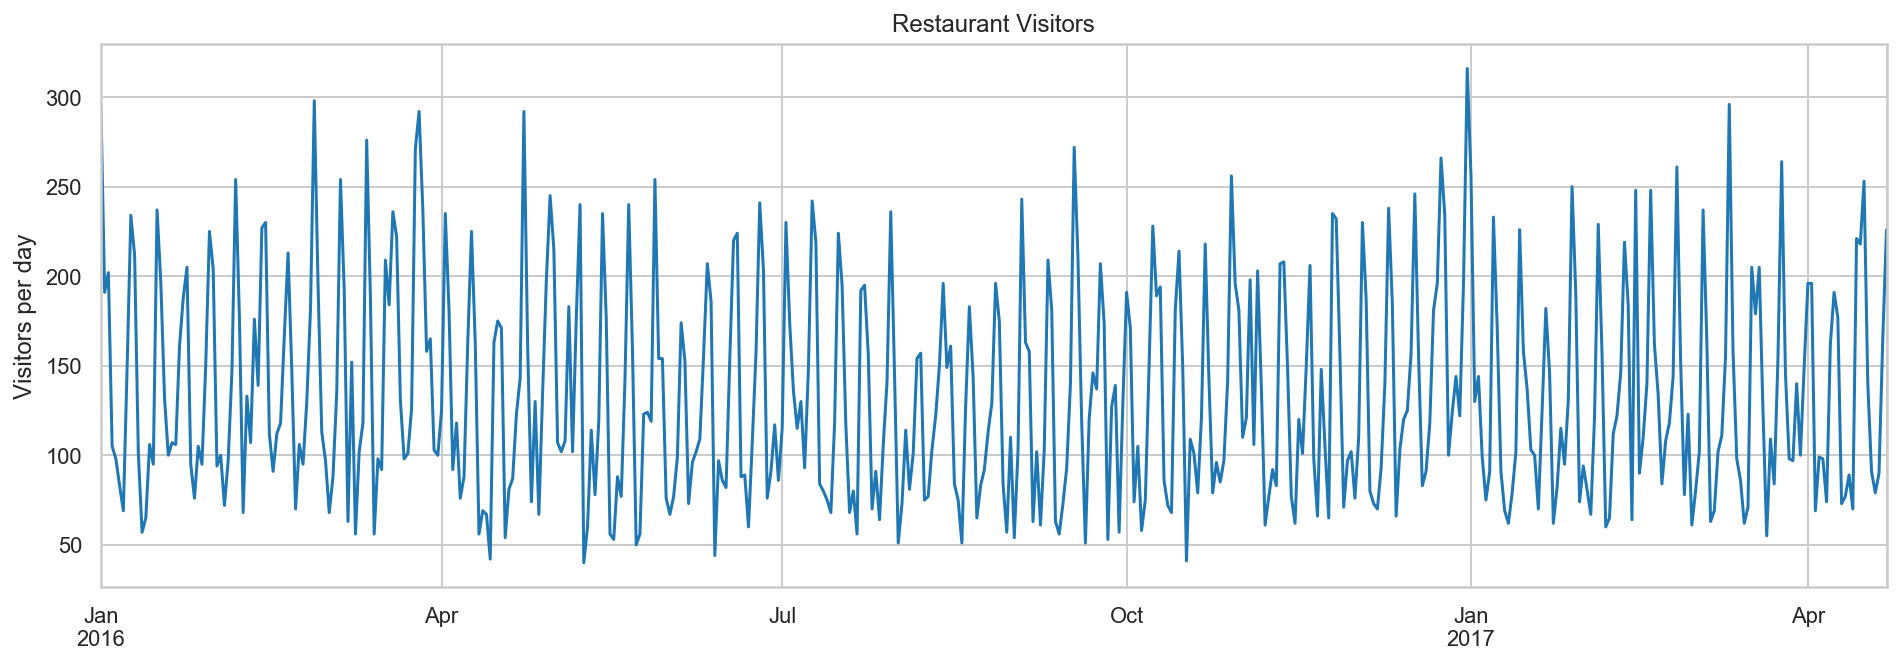

**4. Marque os feriados com linhas verticais em cinza.**

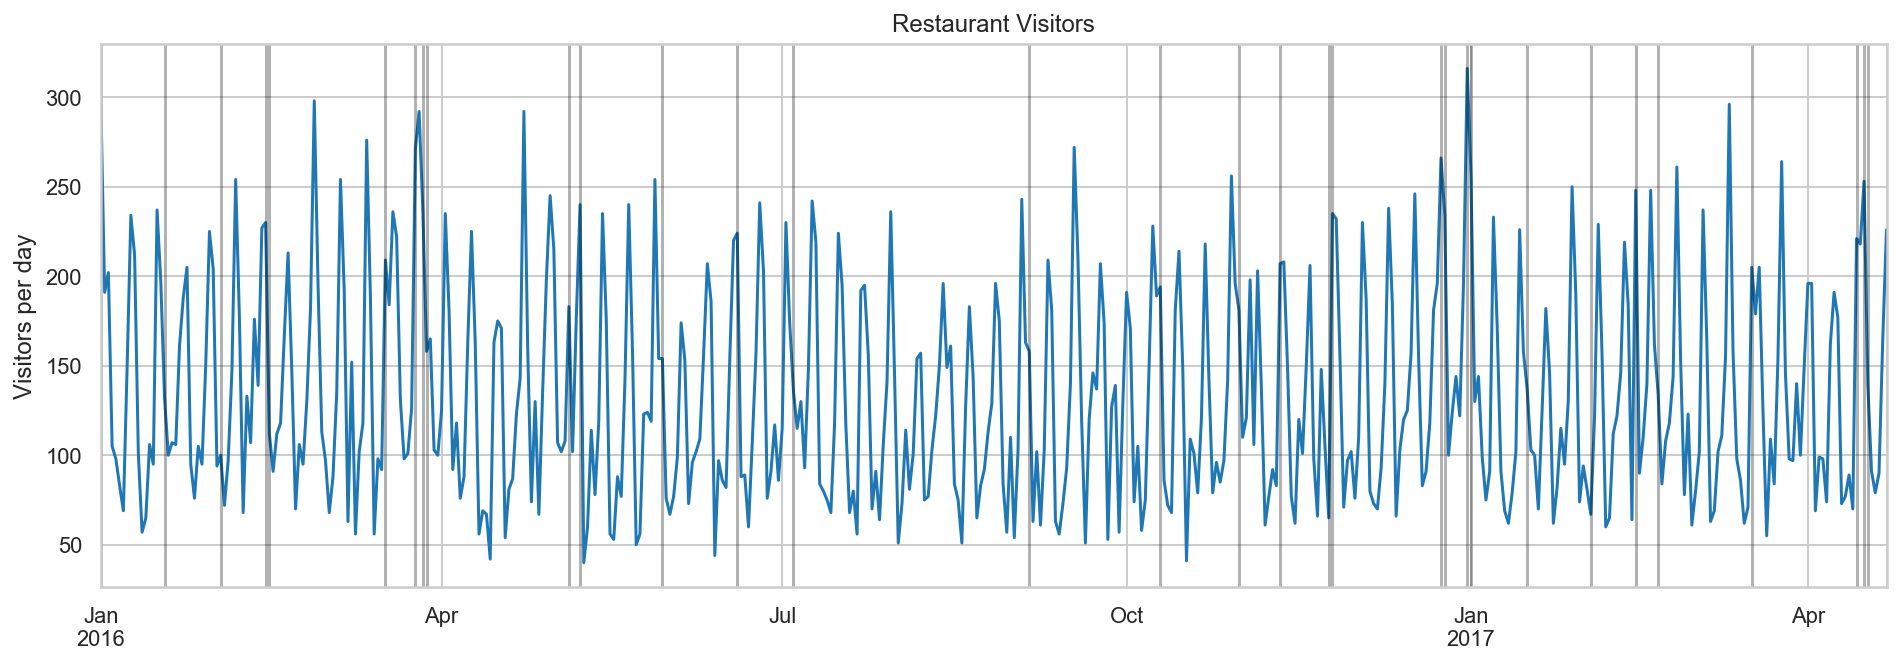

**5. Faça uma decomposição da série em tendência e sazonalidade.**

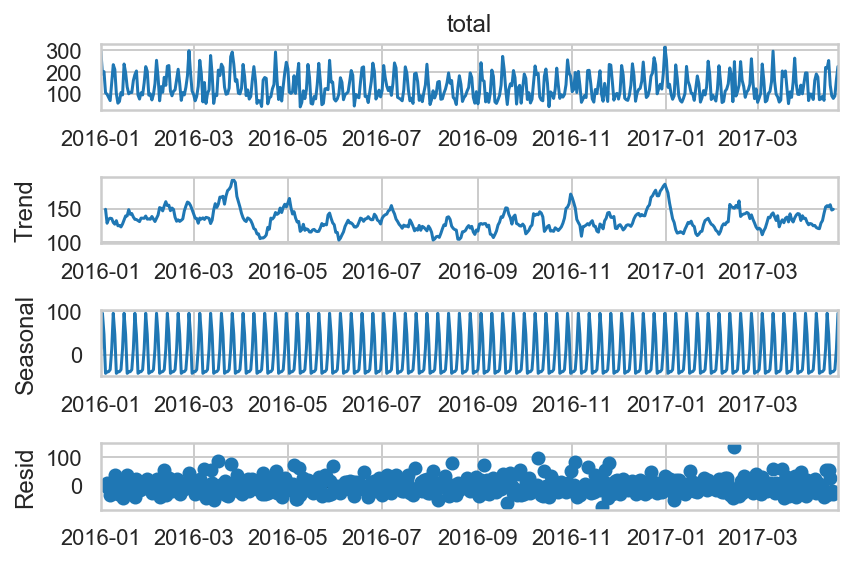

**6. Verifique a estacionariedade da série.**

ADF Statistic: -5.592497
p-value: 0.000001
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


**7. Escolha um modelo SARIMA permitindo termos com sazonalidade 7.**


Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,7) [intercept=True]; AIC=4773.585, BIC=4790.263, Time=0.845 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) [intercept=True]; AIC=5269.484, BIC=5277.823, Time=0.018 seconds
Fit ARIMA(1,0,0)x(1,0,0,7) [intercept=True]; AIC=4916.749, BIC=4933.428, Time=0.606 seconds
Fit ARIMA(0,0,1)x(0,0,1,7) [intercept=True]; AIC=5049.644, BIC=5066.322, Time=0.388 seconds
Fit ARIMA(0,0,0)x(0,0,0,7) [intercept=False]; AIC=6126.084, BIC=6130.254, Time=0.010 seconds
Fit ARIMA(0,0,0)x(0,0,1,7) [intercept=True]; AIC=5093.130, BIC=5105.639, Time=0.154 seconds
Fit ARIMA(0,0,0)x(1,0,0,7) [intercept=True]; AIC=4926.360, BIC=4938.869, Time=0.372 seconds
Fit ARIMA(0,0,0)x(2,0,1,7) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(0,0,0)x(1,0,2,7) [intercept=True]; AIC=4908.769, BIC=4929.617, Time=1.418 seconds
Fit ARIMA(0,0,0)x(0,0,2,7) [intercept=True]; AIC=5010.582, BIC=5027.260, Time=0.534 seconds
Fit ARIMA(0,0,0)x(2,0,0,7) [intercept=True]; AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.792
Date:                   Wed, 12 Aug 2020   AIC                           4773.585
Time:                           23:57:05   BIC                           4790.263
Sample:                                0   HQIC                          4780.142
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.6078      1.729      2.665      0.008       1.219       7.997
ar.S.L7        0.9648      0.013     77.093      0.000       0.940       0.989
ma.S.L7       -0.7134      0.052    -13.741      0.000      -0.815      -0.612
sigma2      1274.9763     78.549     16.232      0.000    1121.024    1428.929
===================================================================================
Ljung-Box (Q):                       68.31   Jarque-Bera (JB):                56.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.69
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**8. Separe uma base de treino e teste. A base de treino pode ter 80% das observações totais.**


**9. Vamos ajustar um modelo SARIMA (0,0,0)x(1,0,1)7 para os dados de treino.**

                                 SARIMAX Results                                 
Dep. Variable:                     total   No. Observations:                  382
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -1842.932
Date:                   Wed, 12 Aug 2020   AIC                           3693.863
Time:                           23:57:49   BIC                           3709.645
Sample:                       01-01-2016   HQIC                          3700.124
                            - 01-16-2017                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.2815      5.088     13.814      0.000      60.310      80.253
ar.S.L7        0.9999   8.96e-05   1.12e+04      0.000       1.000       1.000
ma.S.L7       -0.9389      0

**10.  Obtenha os valores preditos. É importante estabelecer em predict a variável exógena.**

**11. Observe as previsões do modelo e compare com a base de teste.**

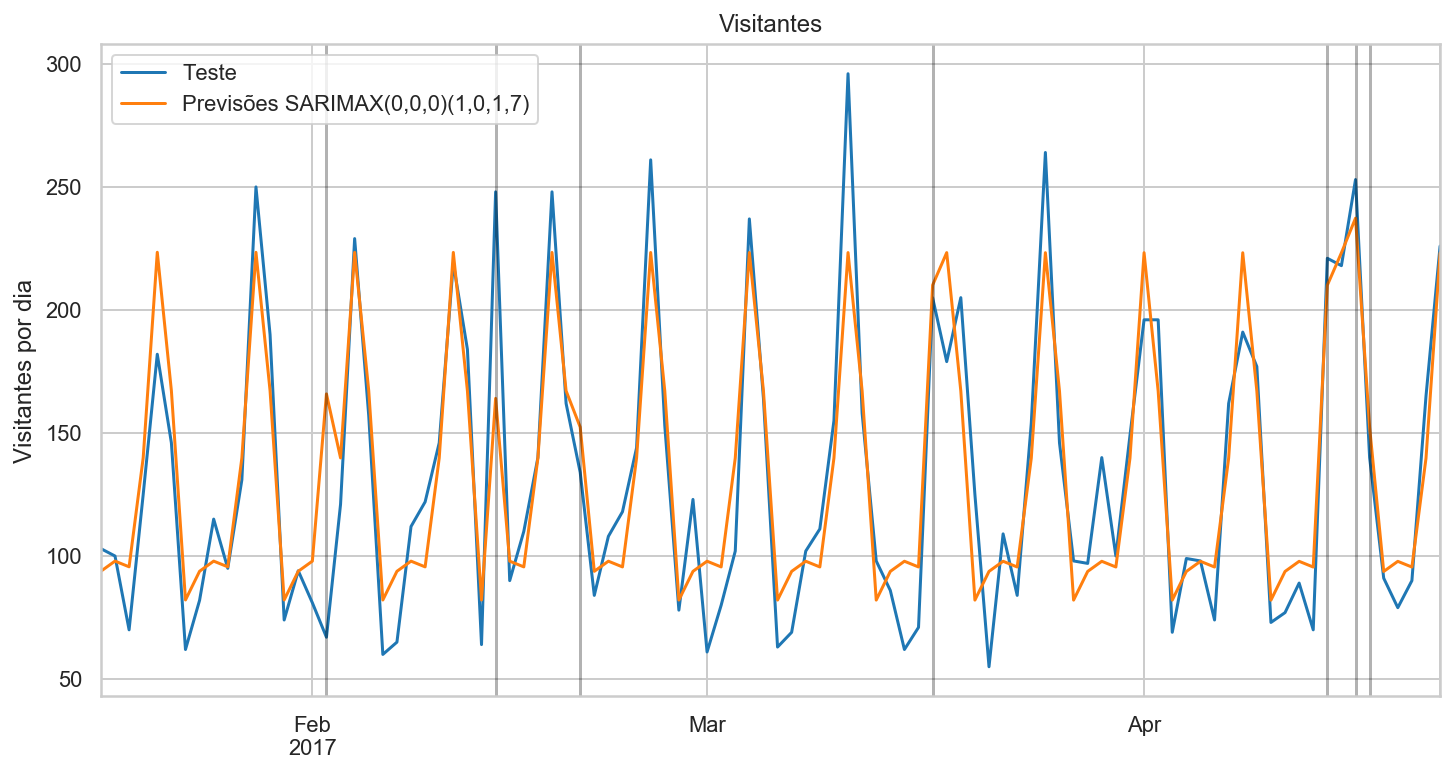

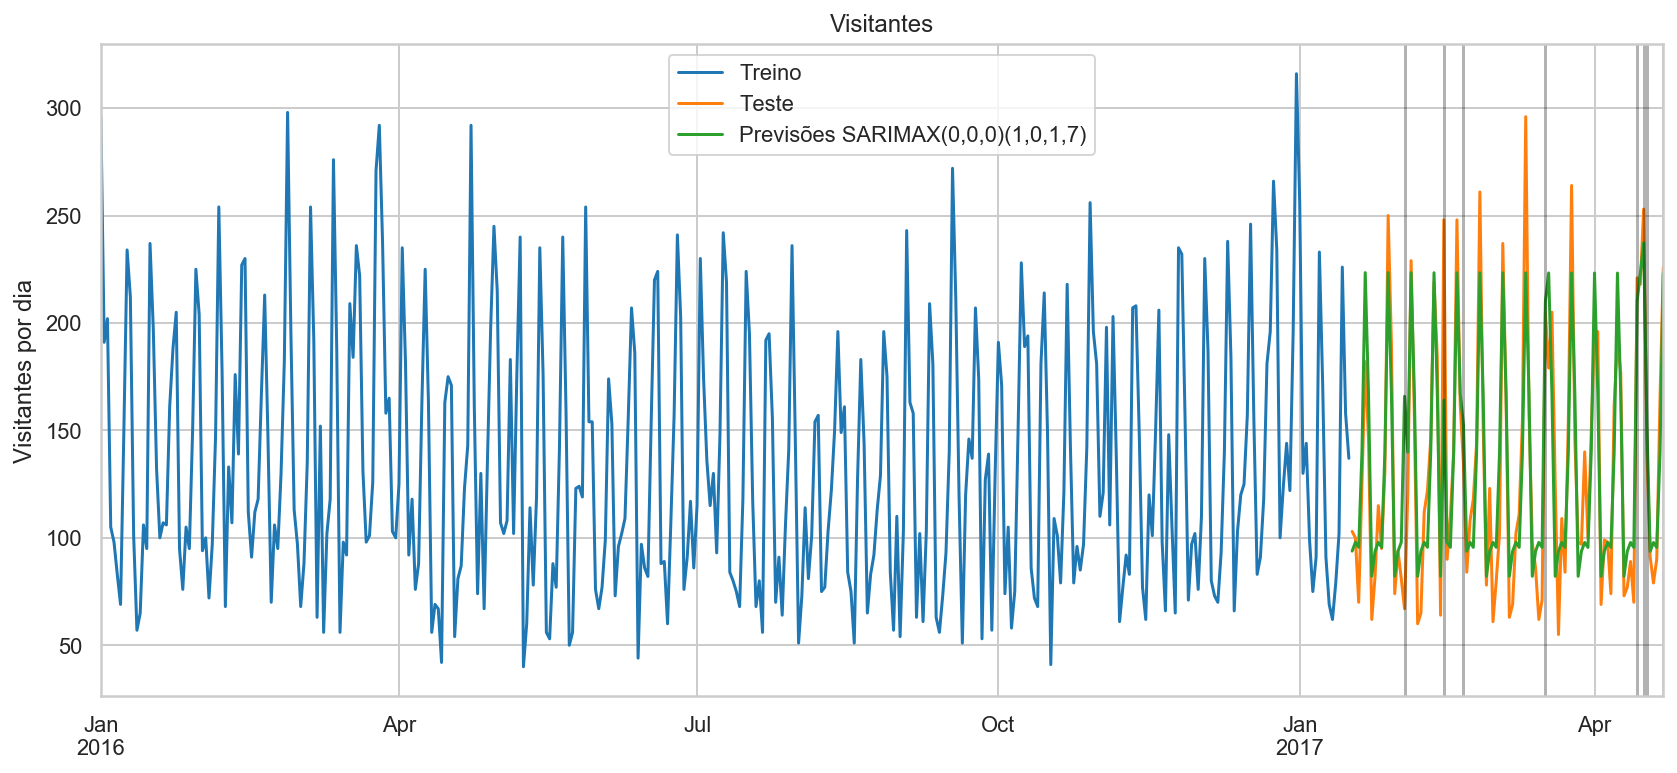

**12. Faça as previsões para as próximas observações, com os feriados disponíveis na base. Nesse caso, não fará diferença a previsão passo à frente ou dinâmica.**

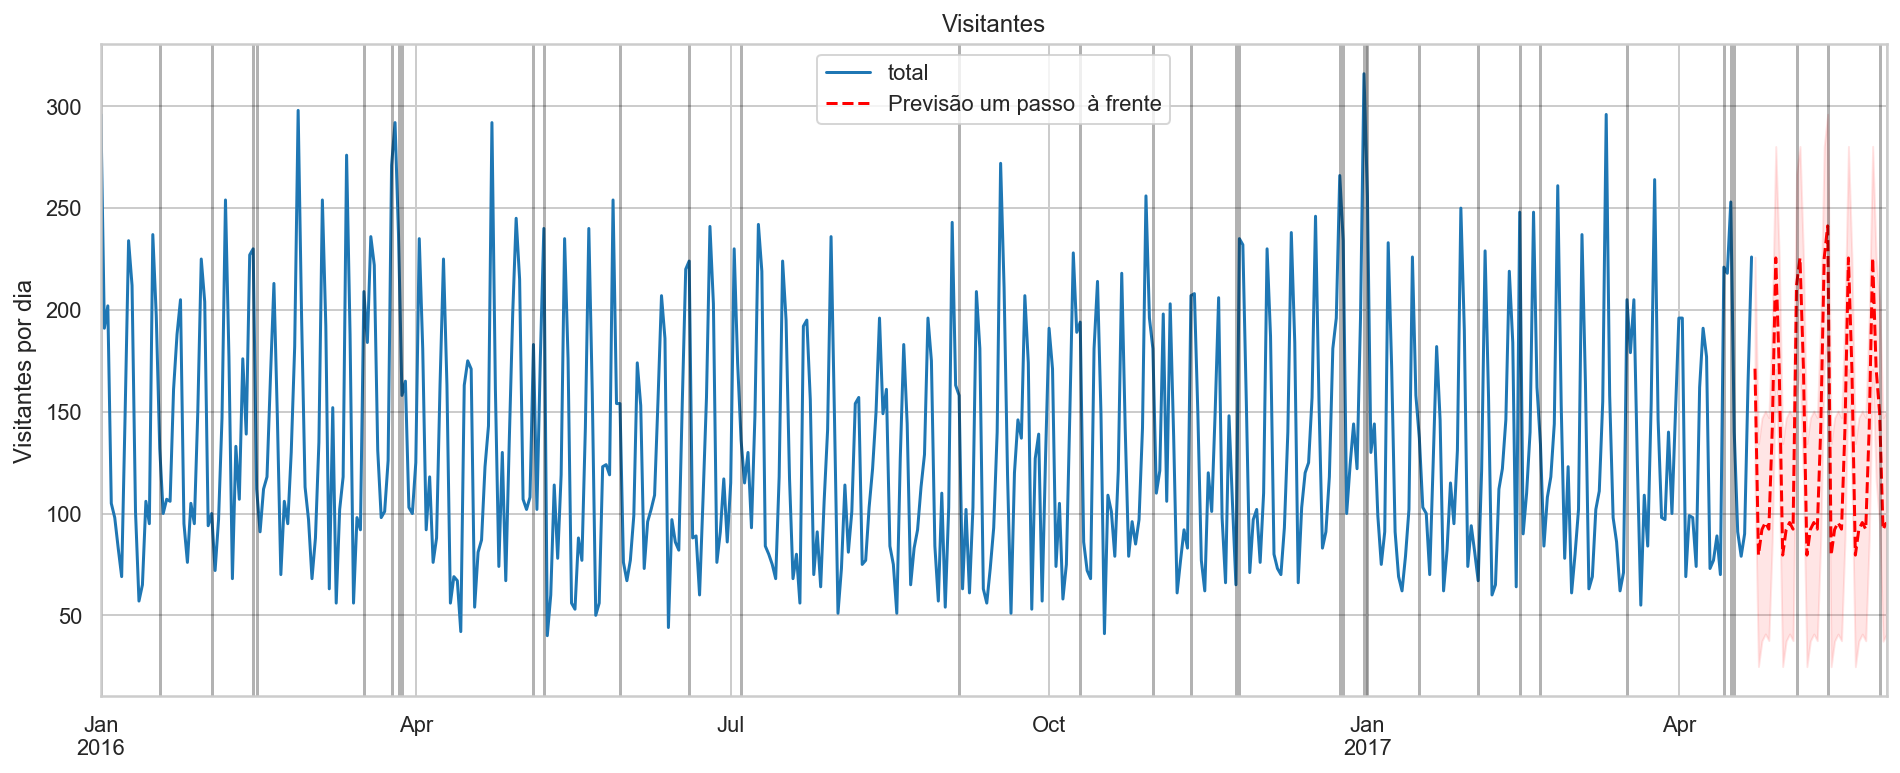

**Para essa aplicação, escolher a previsão dinâmica dynamic=data_previsao_dinamica levará aos mesmos resultados na prática.**

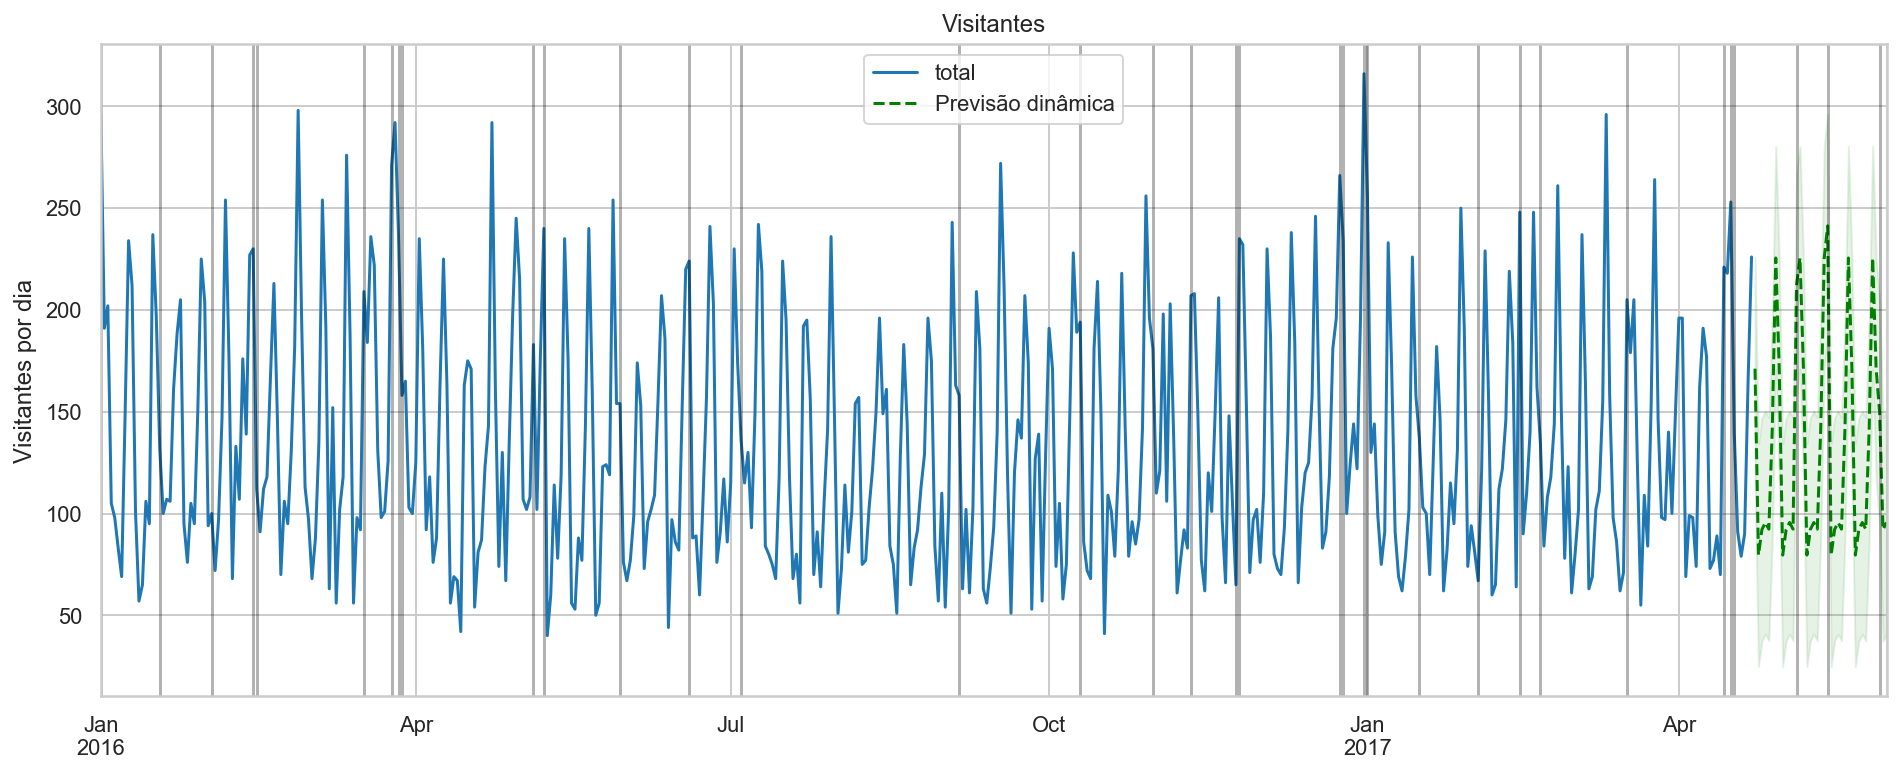

**Prática extra:**

Ajuste e interprete um modelo Bayesiano para a demanda de eletricidade disponível em

https://blog.tensorflow.org/2019/03/structural-time-series-modeling-in.html